In [1]:
#데이터 확인
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_1911 = pd.read_csv('/content/1911-1920 일별 기온.csv',encoding='cp949')
df_1921 = pd.read_csv('/content/1921-1930 일별 기온.csv',encoding='cp949')
df_1931 = pd.read_csv('/content/1931-1940 일별 기온.csv',encoding='cp949')
df_1941 = pd.read_csv('/content/1941-1950 일별 기온.csv',encoding='cp949')
df_1951 = pd.read_csv('/content/1951-1960 일별 기온.csv',encoding='cp949')
df_1961 = pd.read_csv('/content/1961-1970 일별 기온.csv',encoding='cp949')
df_1971 = pd.read_csv('/content/1971-1980 일별 기온.csv',encoding='cp949')
df_1981 = pd.read_csv('/content/1981-1990 일별 기온.csv',encoding='cp949')
df_1991 = pd.read_csv('/content/1991-2000 일별 기온.csv',encoding='cp949')
df_2001 = pd.read_csv('/content/2001-2010 일별 기온.csv',encoding='cp949')
df_2011 = pd.read_csv('/content/2011-2020 일별 기온.csv',encoding='cp949')

In [3]:
df_1911.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,105,강릉,1911-10-04,NaN,12.2,26.2
1,105,강릉,1911-10-09,NaN,6.0,16.6
2,105,강릉,1911-10-16,NaN,9.2,15.5
3,105,강릉,1911-11-01,NaN,6.0,14.8
4,105,강릉,1911-11-04,NaN,10.2,19.5


In [4]:
df_1911.tail()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
22294,165,목포,1920-12-27,1.6,-1.2,6.1
22295,165,목포,1920-12-28,-0.4,-2.8,3.1
22296,165,목포,1920-12-29,1.1,-2.4,5.1
22297,165,목포,1920-12-30,3.9,0.9,5.8
22298,165,목포,1920-12-31,6.8,2.5,12.2


In [5]:
#데이터 결합
df = pd.concat([df_1911,df_1921,df_1931,df_1941,df_1951,df_1961,df_1971,df_1981,df_1991,df_2001,df_2011],ignore_index=True)

In [6]:
df.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,105,강릉,1911-10-04,NaN,12.2,26.2
1,105,강릉,1911-10-09,NaN,6.0,16.6
2,105,강릉,1911-10-16,NaN,9.2,15.5
3,105,강릉,1911-11-01,NaN,6.0,14.8
4,105,강릉,1911-11-04,NaN,10.2,19.5


In [8]:
df.dtypes

지점            int64
지점명          object
일시           object
평균기온(°C)    float64
최저기온(°C)    float64
최고기온(°C)    float64
dtype: object

In [9]:
df['일시'] = pd.to_datetime(df['일시'])

In [10]:
df.dtypes

지점                   int64
지점명                 object
일시          datetime64[ns]
평균기온(°C)           float64
최저기온(°C)           float64
최고기온(°C)           float64
dtype: object

In [11]:
df['지점명'].nunique()

102

In [12]:
df.shape

(1596835, 6)

###서울시 폭염/열대야 현황 시각화

In [15]:
df_seoul = df[df['지점명'] == '서울'].copy()
df_seoul

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
3299,108,서울,1911-01-01,-10.1,-14.2,-6.5
3300,108,서울,1911-01-02,-12.5,-19.7,-5.9
3301,108,서울,1911-01-03,-4.3,-10.2,-1.4
3302,108,서울,1911-01-04,0.8,-2.6,2.2
3303,108,서울,1911-01-05,-3.9,-8.7,1.7
...,...,...,...,...,...,...
1295576,108,서울,2020-12-27,5.8,1.4,10.0
1295577,108,서울,2020-12-28,6.7,4.2,11.4
1295578,108,서울,2020-12-29,0.1,-6.2,4.3
1295579,108,서울,2020-12-30,-10.9,-12.9,-6.2


In [17]:
df_seoul_hotday = df_seoul[df_seoul['최고기온(°C)'] >= 33].copy()
df_seoul_hotday

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
3519,108,서울,1911-08-09,27.0,23.1,33.0
3520,108,서울,1911-08-10,28.2,24.2,33.8
3522,108,서울,1911-08-12,28.7,25.8,34.5
3523,108,서울,1911-08-13,27.5,23.0,33.8
3527,108,서울,1911-08-17,26.4,21.5,33.5
...,...,...,...,...,...,...
1295075,108,서울,2019-08-14,30.4,25.9,35.7
1295379,108,서울,2020-06-13,26.9,20.6,33.5
1295388,108,서울,2020-06-22,28.6,21.7,35.4
1295452,108,서울,2020-08-25,29.9,26.0,34.5


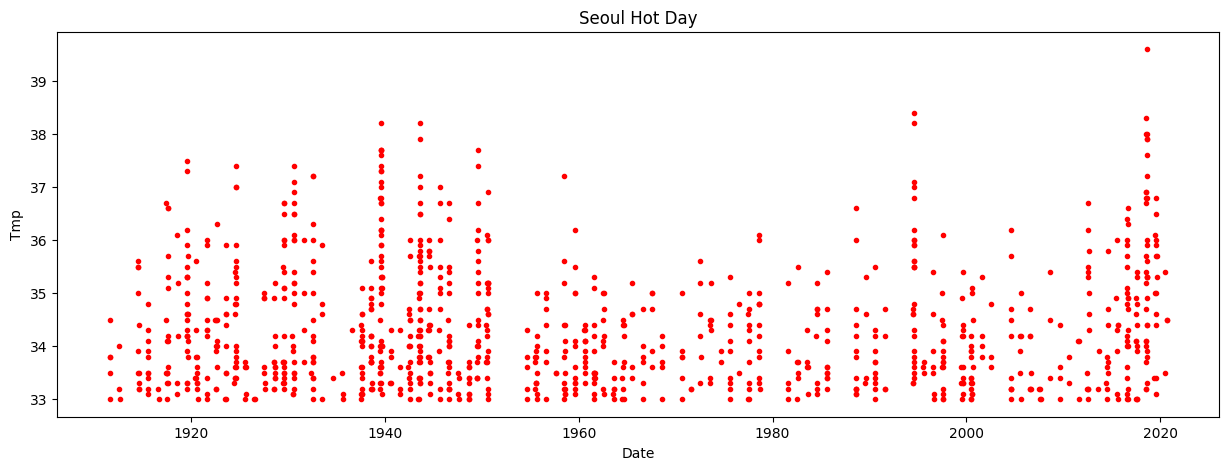

In [21]:
plt.rcParams['figure.figsize'] = (15,5)
plt.plot(df_seoul_hotday['일시'],df_seoul_hotday['최고기온(°C)'],'r.')
plt.xlabel('Date')
plt.ylabel('Tmp')
plt.title('Seoul Hot Day')
plt.show()

###서울시 열대야 데이터 추출 및 시각화

In [51]:
df_seoul_hotnight = df_seoul[df_seoul['최저기온(°C)']>=25]
df_seoul_hotnight

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
3522,108,서울,1911-08-12,28.7,25.8,34.5
4601,108,서울,1914-07-26,29.7,25.8,35.6
4602,108,서울,1914-07-27,30.2,25.6,35.5
4605,108,서울,1914-07-30,25.7,25.1,27.4
4621,108,서울,1914-08-15,27.2,25.2,31.5
...,...,...,...,...,...,...
1295452,108,서울,2020-08-25,29.9,26.0,34.5
1295453,108,서울,2020-08-26,30.2,27.0,34.5
1295454,108,서울,2020-08-27,27.1,25.6,28.6
1295455,108,서울,2020-08-28,27.3,26.0,29.7


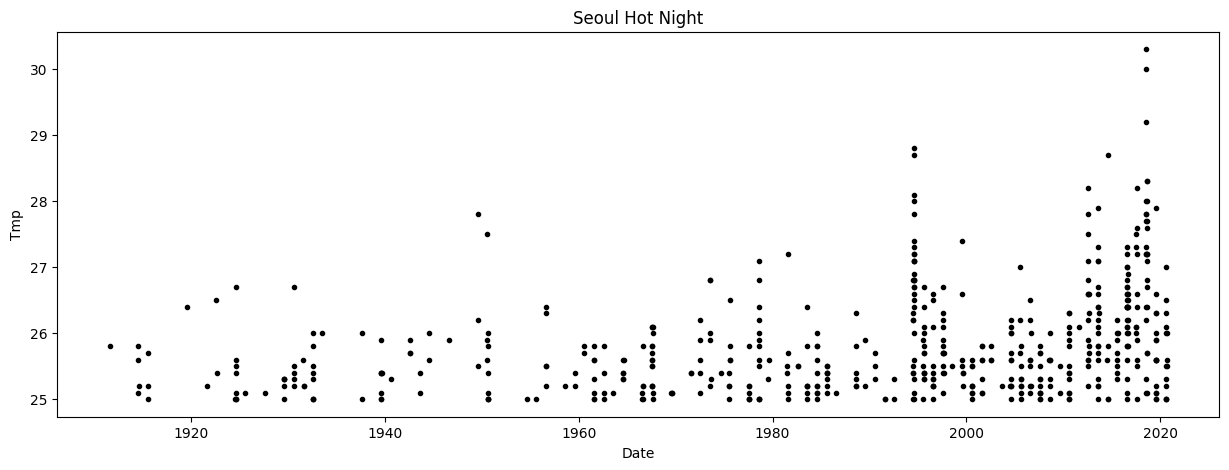

In [52]:
plt.plot(df_seoul_hotnight['일시'],df_seoul_hotnight['최저기온(°C)'],'k.')
plt.xlabel('Date')
plt.ylabel('Tmp')
plt.title('Seoul Hot Night')
plt.show()

### 최고 폭염일, 최고 열대야 강조하기

In [53]:
df_seoul_hotestday = df_seoul_hotday.nlargest(10,'최고기온(°C)')
df_seoul_hotestday

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1294697,108,서울,2018-08-01,33.6,27.8,39.6
719667,108,서울,1994-07-24,33.1,28.1,38.4
1294696,108,서울,2018-07-31,32.6,27.8,38.3
57401,108,서울,1939-08-10,30.1,24.5,38.2
85687,108,서울,1943-08-24,29.0,23.2,38.2
719666,108,서울,1994-07-23,32.6,28.0,38.2
1294687,108,서울,2018-07-22,31.8,25.3,38.0
1294711,108,서울,2018-08-15,31.7,28.3,38.0
85691,108,서울,1943-08-28,29.2,24.5,37.9
1294698,108,서울,2018-08-02,33.7,30.3,37.9


In [54]:
df_seoul_hotestday = df_seoul_hotestday.iloc[[0]]
df_seoul_hotestday

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1294697,108,서울,2018-08-01,33.6,27.8,39.6


In [55]:
print(df_seoul_hotestday.iloc[0,2].date())
print(df_seoul_hotestday.iloc[0,5])

2018-08-01
39.6


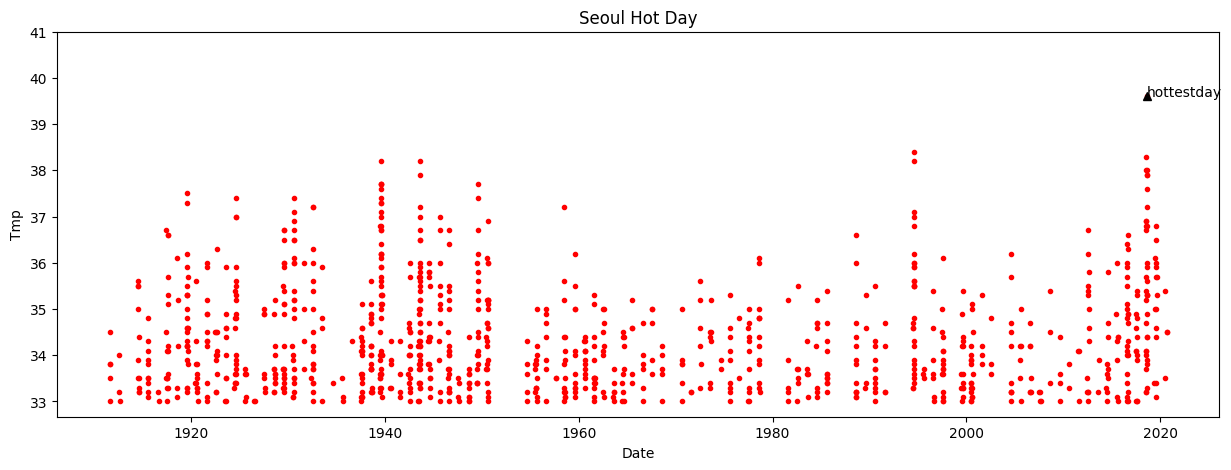

In [56]:
plt.plot(df_seoul_hotday['일시'],df_seoul_hotday['최고기온(°C)'],'r.')
plt.xlabel('Date')
plt.ylabel('Tmp')
plt.title('Seoul Hot Day')

plt.plot(df_seoul_hotestday.iloc[0,2].date(),df_seoul_hotestday.iloc[0,5],'k^')
plt.text(df_seoul_hotestday.iloc[0,2].date(),df_seoul_hotestday.iloc[0,5],'hottestday')
plt.yticks(range(33,42))
plt.show()

In [58]:
df_seoul_hotestnight = df_seoul_hotnight.nlargest(10,'최저기온(°C)')
df_seoul_hotestnight

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1294698,108,서울,2018-08-02,33.7,30.3,37.9
1294699,108,서울,2018-08-03,33.1,30.0,37.9
1294688,108,서울,2018-07-23,31.7,29.2,35.7
719689,108,서울,1994-08-15,30.3,28.8,33.5
719672,108,서울,1994-07-29,31.0,28.7,35.6
1293237,108,서울,2014-08-02,31.4,28.7,35.8
1294702,108,서울,2018-08-06,30.5,28.3,35.3
1294711,108,서울,2018-08-15,31.7,28.3,38.0
1292509,108,서울,2012-08-04,31.7,28.2,36.2
1294337,108,서울,2017-08-06,29.8,28.2,34.0


In [59]:
df_seoul_hotestnight.iloc[0,2].date()
df_seoul_hotestnight.iloc[0,4]

30.3

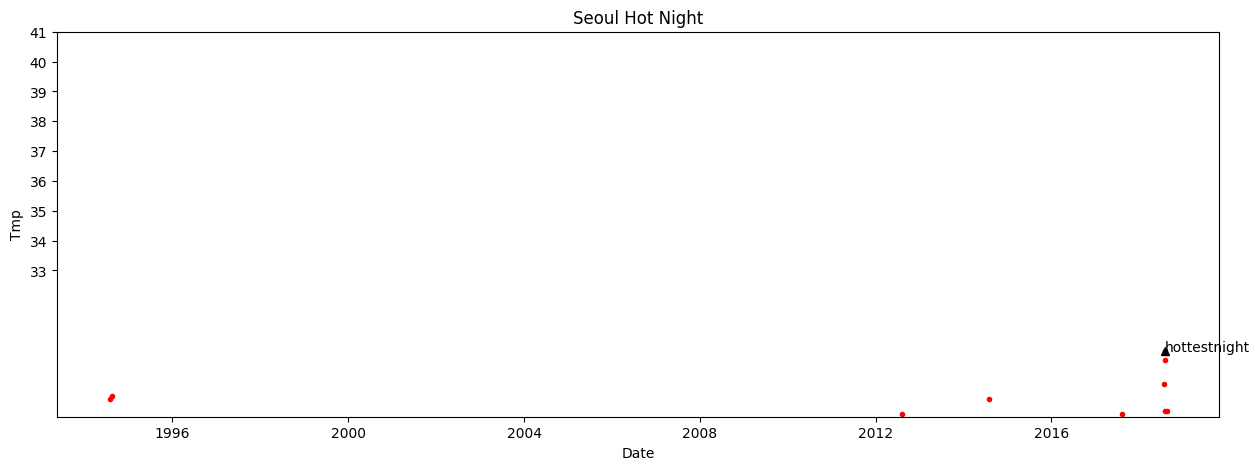

In [60]:
plt.plot(df_seoul_hotestnight['일시'],df_seoul_hotestnight['최저기온(°C)'],'r.')
plt.xlabel('Date')
plt.ylabel('Tmp')
plt.title('Seoul Hot Night')

plt.plot(df_seoul_hotestnight.iloc[0,2].date(),df_seoul_hotestnight.iloc[0,4],'k^')
plt.text(df_seoul_hotestnight.iloc[0,2].date(),df_seoul_hotestnight.iloc[0,4],'hottestnight')
plt.yticks(range(33,42))
plt.show()

In [70]:
df_seoul_hotday_count = df_seoul_hotday.groupby(df_seoul_hotday['일시'].dt.year)['일시'].count().to_frame()

In [71]:
df_years = pd.DataFrame(range(1911,2021))
df_years.index = df_years[0]
df_years

,0
0,
1911,1911
1912,1912
1913,1913
1914,1914
1915,1915
...,...
2016,2016
2017,2017
2018,2018


In [90]:
df_seoul_hotday_count = pd.concat([df_seoul_hotday_count,df_years],axis=1)

In [91]:
df_seoul_hotday_count.drop(columns=[0],inplace = True)